In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
# I get the data per minute, the goal is to check how the price change in the first minutes of days with high volatility)

x_m= get_pricing('NIO', start_date='2020-01-01',end_date='2020-07-08', frequency='minute')

# I get the daily data to select which days had hihg volatility

x_d= get_pricing('NIO', start_date='2020-01-01',end_date='2020-07-08', frequency='daily')

In [17]:
# This represent the perecentage difference of the price of the stock between the close of the previous day,
# and the open price of the current day

x_d['overnight change']=(x_d['open_price']- x_d['close_price'].shift(1))/x_d['close_price'].shift(1)

# This represent the perecentage difference of the price of the stock between the close,
# and the open price of the previous day

x_d['previous_day_change']=(x_d['close_price'].shift(1)-x_d['open_price'].shift(1))/x_d['open_price'].shift(1)

# This is the exponential weight average of the open price of the current day with a window of 20 days 

x_d['open EWMA 20 days'] = x_d['open_price'].ewm(span=20).mean()

In [18]:
# Get the indexes of the last 7 days in the market

seven_days=x_d[-7:].index

In [19]:
# Table with 7 data frames, one per day

table_seven={}

In [20]:
# In this way I fill the tables with the information I need 

for x in sorted(seven_days.strftime('%Y-%m-%d')):
    table_seven[x]=x_m[x]['open_price']

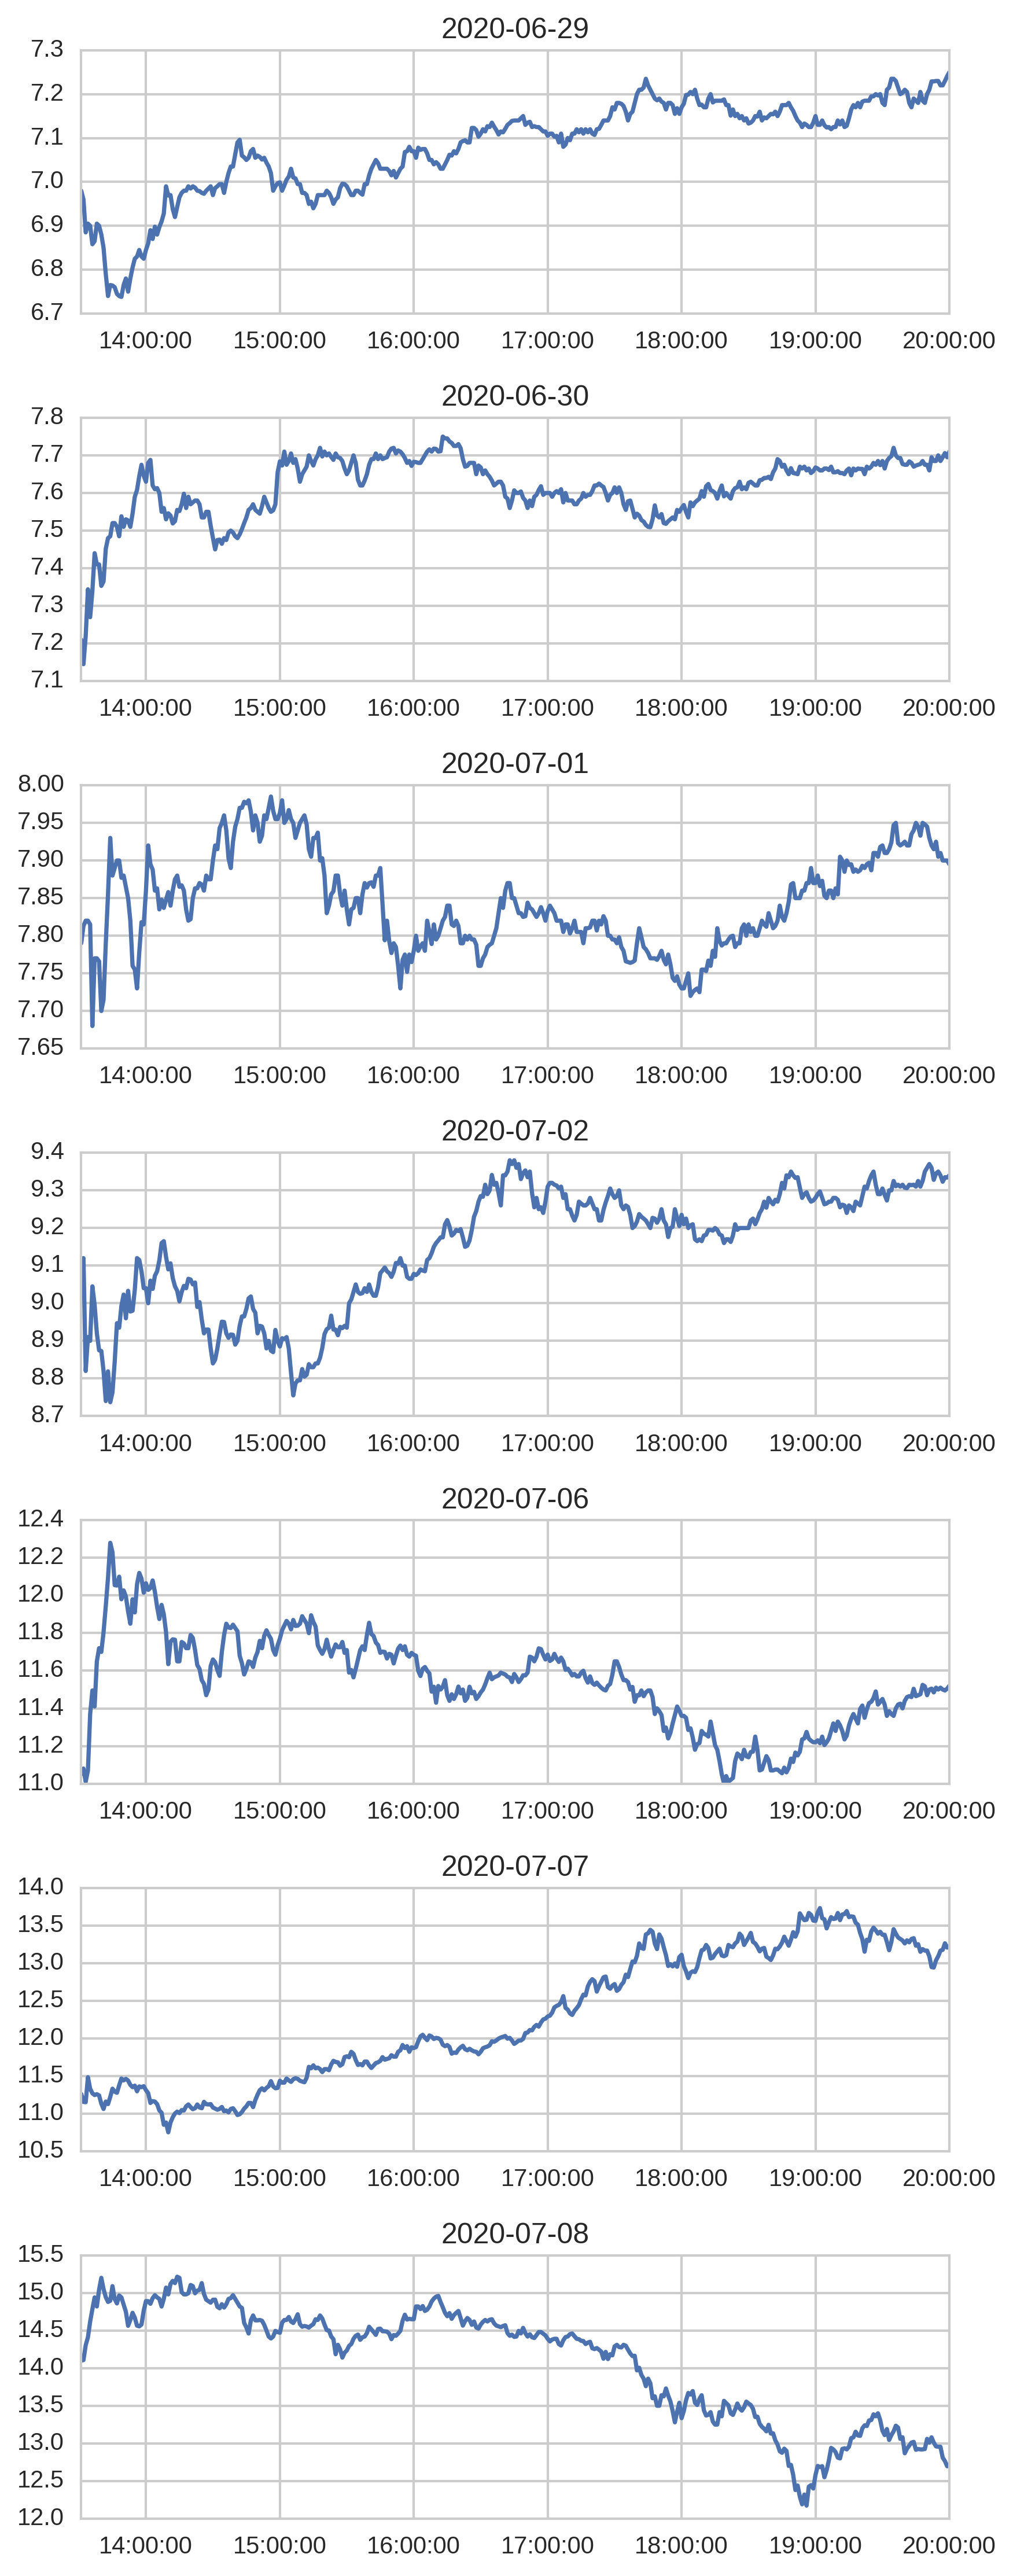

In [21]:
# In this way I can print one picture per each data frame in the dictionary
# The order depend in the dictionary order.
# I want to print the plots of the last 7 days


fig_1, axes = plt.subplots(nrows=len(table_seven.keys()), ncols=1, figsize=(6,15), dpi=300)

fig_dic={}
i=-1

for x,y in sorted(zip(((table_seven.keys())),table_seven.values())):
    i=i+1
    axes[i].plot(y)
    axes[i].set_title(x)
    
plt.tight_layout()

In [15]:
x_d.tail(7)

,open_price,high,low,close_price,volume,price,overnight change,previous_day_change,open EWMA 20 days
2020-06-29 00:00:00+00:00,15.52,16.800,14.92,16.78,32094941.0,16.78,-0.020202,-0.022825,17.568370
2020-06-30 00:00:00+00:00,16.55,16.710,15.85,16.40,20812620.0,16.40,-0.013707,0.081186,17.471382
2020-07-01 00:00:00+00:00,16.94,17.825,16.19,16.36,30021428.0,16.36,0.032927,-0.009063,17.420774
2020-07-02 00:00:00+00:00,17.05,17.170,15.80,15.88,26070640.0,15.88,0.042176,-0.034238,17.385462
2020-07-06 00:00:00+00:00,16.04,16.220,15.11,15.61,28719479.0,15.61,0.010076,-0.068622,17.257322
2020-07-07 00:00:00+00:00,15.16,15.400,14.56,14.58,25733915.0,14.58,-0.028828,-0.026808,17.057577
2020-07-08 00:00:00+00:00,14.53,15.480,14.27,15.32,25651388.0,15.32,-0.003429,-0.038259,16.816855


In [10]:
x_m['2020-06-25']

,open_price,high,low,close_price,volume,price
2020-06-25 13:31:00+00:00,954.270,955.500,951.500,953.530,100862.0,953.530
2020-06-25 13:32:00+00:00,953.745,957.400,953.650,956.698,32373.0,956.698
2020-06-25 13:33:00+00:00,956.832,957.800,948.010,950.020,51145.0,950.020
2020-06-25 13:34:00+00:00,949.346,951.570,948.140,950.094,42706.0,950.094
2020-06-25 13:35:00+00:00,949.785,950.000,945.530,948.710,52098.0,948.710
2020-06-25 13:36:00+00:00,948.495,952.830,946.980,947.870,36178.0,947.870
2020-06-25 13:37:00+00:00,948.000,950.000,947.160,949.654,19774.0,949.654
2020-06-25 13:38:00+00:00,949.550,950.640,945.450,945.800,35110.0,945.800
2020-06-25 13:39:00+00:00,945.470,947.370,944.060,944.250,50046.0,944.250
2020-06-25 13:40:00+00:00,944.388,947.660,944.388,947.335,38356.0,947.335


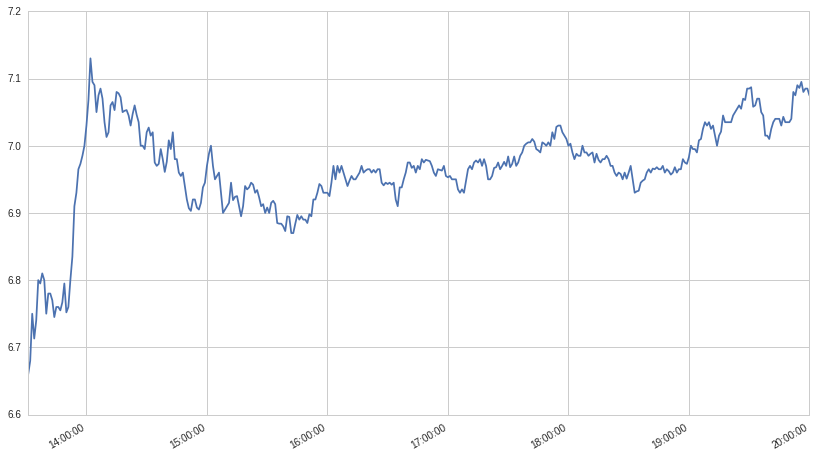

In [55]:
table_seven['2020-06-25'].plot()

In [63]:
table_seven.keys()

dict_keys(['2020-06-24', '2020-06-26', '2020-06-29', '2020-07-01', '2020-06-30', '2020-06-25', '2020-07-02'])

In [60]:
sorted(table_seven.keys())

['2020-06-24',
 '2020-06-25',
 '2020-06-26',
 '2020-06-29',
 '2020-06-30',
 '2020-07-01',
 '2020-07-02']

In [88]:
# find the right place to sort dates

In [90]:
sorted(zip(((table_seven.keys())),table_seven.values()))

[('2020-06-24', 2020-06-24 13:31:00+00:00    17.220
  2020-06-24 13:32:00+00:00    17.166
  2020-06-24 13:33:00+00:00    17.100
  2020-06-24 13:34:00+00:00    17.141
  2020-06-24 13:35:00+00:00    16.920
  2020-06-24 13:36:00+00:00    16.850
  2020-06-24 13:37:00+00:00    16.830
  2020-06-24 13:38:00+00:00    16.920
  2020-06-24 13:39:00+00:00    16.870
  2020-06-24 13:40:00+00:00    16.890
  2020-06-24 13:41:00+00:00    16.770
  2020-06-24 13:42:00+00:00    16.710
  2020-06-24 13:43:00+00:00    16.680
  2020-06-24 13:44:00+00:00    16.699
  2020-06-24 13:45:00+00:00    16.551
  2020-06-24 13:46:00+00:00    16.655
  2020-06-24 13:47:00+00:00    16.605
  2020-06-24 13:48:00+00:00    16.385
  2020-06-24 13:49:00+00:00    16.348
  2020-06-24 13:50:00+00:00    16.301
  2020-06-24 13:51:00+00:00    16.200
  2020-06-24 13:52:00+00:00    16.265
  2020-06-24 13:53:00+00:00    16.366
  2020-06-24 13:54:00+00:00    16.381
  2020-06-24 13:55:00+00:00    16.295
  2020-06-24 13:56:00+00:00    16.35